In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


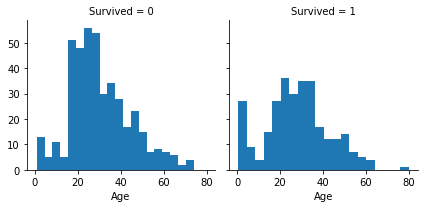

In [4]:
g = sns.FacetGrid(df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

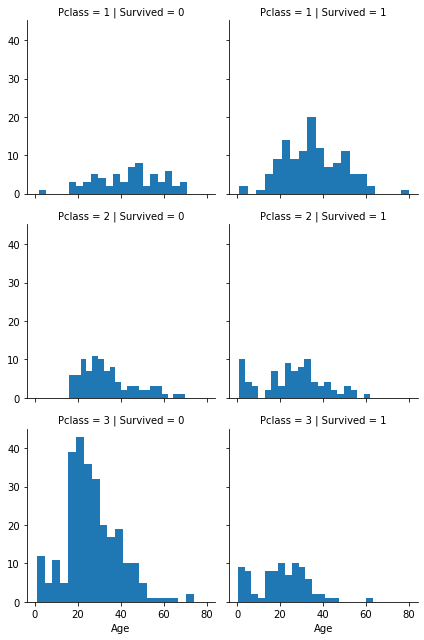

In [5]:
g = sns.FacetGrid(df, col = 'Survived', row = 'Pclass')
g.map(plt.hist, 'Age', bins = 20)

In [6]:
#3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#4
#Unique PassengerId Ticket
del df['PassengerId'], df['Name'], df['Ticket'], df['Cabin']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
import numpy as np

In [11]:
#5
# df['Age'].fillnan(0)
df['Age'] = df['Age'].replace(np.nan, 0)
df['Age'] = 1912 - df['Age']
df['Age']

0      1890.0
1      1874.0
2      1886.0
3      1877.0
4      1877.0
        ...  
886    1885.0
887    1893.0
888    1912.0
889    1886.0
890    1880.0
Name: Age, Length: 891, dtype: float64

In [12]:
#6
df.rename(columns={'Embarked': 'Порт', 
                  'Survived': 'Выжил',
                   'Pclass': 'Класс',
                   'Sex': 'Пол',
                   'Age': 'Год рождения',
                   'SibSp': 'Братья/Сестры',
                   'Parch': 'Родители',
                   'Fare': 'Цена'
                  }, inplace=True)
df

,Выжил,Класс,Пол,Год рождения,Братья/Сестры,Родители,Цена,Порт
0,0,3,male,1890.0,1,0,7.2500,S
1,1,1,female,1874.0,1,0,71.2833,C
2,1,3,female,1886.0,0,0,7.9250,S
3,1,1,female,1877.0,1,0,53.1000,S
4,0,3,male,1877.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,1885.0,0,0,13.0000,S
887,1,1,female,1893.0,0,0,30.0000,S
888,0,3,female,1912.0,1,2,23.4500,S
889,1,1,male,1886.0,0,0,30.0000,C


In [13]:
#7
df['Порт'] = df['Порт'].replace(np.nan, df['Порт'].value_counts().index[0])
df['Год рождения'][df['Год рождения'] == 1912] = np.nan
df['Год рождения'] = df['Год рождения'].replace(np.nan, df['Год рождения'].mean())

<ipython-input-13-072cbd2233a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Год рождения'][df['Год рождения'] == 1912] = np.nan


In [14]:
df['Год рождения'][df['Год рождения'] == 1912]

Series([], Name: Год рождения, dtype: float64)

In [15]:
#8
df.to_csv('Train2.csv', encoding='utf-8')

In [16]:
#9,10
df.to_excel('Train2.xlsx', encoding='utf-8')
df_2 = pd.read_excel('Train2.xlsx')
df_2

,Unnamed: 0,Выжил,Класс,Пол,Год рождения,Братья/Сестры,Родители,Цена,Порт
0,0,0,3,male,1890.000000,1,0,7.2500,S
1,1,1,1,female,1874.000000,1,0,71.2833,C
2,2,1,3,female,1886.000000,0,0,7.9250,S
3,3,1,1,female,1877.000000,1,0,53.1000,S
4,4,0,3,male,1877.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,1885.000000,0,0,13.0000,S
887,887,1,1,female,1893.000000,0,0,30.0000,S
888,888,0,3,female,1882.300882,1,2,23.4500,S
889,889,1,1,male,1886.000000,0,0,30.0000,C


## Контрольные вопросы

#### 
1. Какие две главные структуры данных используются в pandas? В чем их отличие?
- Series — это структура, используемая для работы с последовательностью одномерных данных. (+ есть только индекс)
- Dataframe — более сложная структура. Она подходит для нескольких измерений разных типов. (Индексы + колонки)
2. Назовите основные функции чтения данных из файлов <br>
pd.read_csv, pd.read_excel, .info(), .describe() и тд
3. Напишите функцию записи набора данных А в файл с разделителями-запятыми <br>
A = pd.read_csv('filename.csv', sep = ',')
4. Как называется функция, выводящая на экран первые N строчек набора данных? <br>
A.head(N)
5. С помощью какой функции можно удалить поле набора данных? А строку?
- поле набора данных: del['Название столбца']  <br>
или А.drop(['Название столбца', ...], axis=1)
- строку: А.drop([0, 1]) - удалятся 0 и 1 строки
6. Напишите участок кода, демонстрирующий возможность добавления новой строки к набору данных. <br>
A.loc[len(A)] = [..., ..., ..., ...] <br>
или A.loc[df.index.A()+1] = [..., ..., ..., ...] <br>
или можно сделать из новой строчки df: <br>
B = pd.DataFrame([..., ..., ..., ...], header = None) <br>
A = pd.concat([A, B], ignore_index = True, axis = 0) <br>
A.reset_index() <br>
7. Напишите участок кода, демонстрирующий возможность добавления новой колонки (поля) к набору данных. <br>
A.['Название нового столбца'] = series или list 